# Random Search, Grid Search Porject 4

- Grid Search로 DT 알고리즘 모델 튜닝
- Mobile 데이터로 모델링

In [1]:
# Library 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%config InlineBackend.figure_format='retina'

In [2]:
# 데이터 불러오기
path = 'https://raw.githubusercontent.com/jangrae/csv/master/mobile.csv'
data = pd.read_csv(path)

In [3]:
# 상위 5개 행 확인
data.head()

,id,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,CHURN
0,1,0,31953,0,6,313378,161,0,4,unsat,little,no,0
1,2,1,36147,0,13,800586,244,0,6,unsat,little,considering,0
2,3,1,27273,230,0,305049,201,16,15,unsat,very_little,perhaps,0
3,4,0,120070,38,33,788235,780,3,2,unsat,very_high,considering,1
4,5,1,29215,208,85,224784,241,21,1,very_unsat,little,never_thought,0


In [4]:
# 기초통계량 확인
data.describe()

,id,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,CHURN
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,10000.500000,0.502400,80281.447750,85.979550,23.898650,493155.264250,389.615100,8.000700,6.002250,0.492600
std,5773.647028,0.500007,41680.586319,85.992324,26.816645,252407.884692,213.820682,8.925418,4.402558,0.499958
min,1.000000,0.000000,20007.000000,-2.000000,0.000000,150002.000000,130.000000,0.000000,1.000000,0.000000
25%,5000.750000,0.000000,42217.000000,0.000000,0.000000,263714.250000,219.000000,1.000000,2.000000,0.000000
50%,10000.500000,1.000000,75366.500000,59.000000,14.000000,452259.500000,326.000000,4.000000,5.000000,0.000000
75%,15000.250000,1.000000,115881.750000,179.000000,41.000000,702378.000000,533.250000,15.000000,10.000000,1.000000
max,20000.000000,1.000000,159983.000000,335.000000,89.000000,999996.000000,899.000000,29.000000,15.000000,1.000000


In [5]:
# 변수 제거 : id
drop_cols = ['id']
data.drop(drop_cols, axis=1, inplace=True)
data.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,CHURN
0,0,31953,0,6,313378,161,0,4,unsat,little,no,0
1,1,36147,0,13,800586,244,0,6,unsat,little,considering,0
2,1,27273,230,0,305049,201,16,15,unsat,very_little,perhaps,0
3,0,120070,38,33,788235,780,3,2,unsat,very_high,considering,1
4,1,29215,208,85,224784,241,21,1,very_unsat,little,never_thought,0


In [6]:
# x, y 분리
target = 'CHURN'

x = data.drop(target, axis=1)
y = data.loc[:, target]

In [7]:
# 가변수화 : REPORTED_SATISFACTION, REPORTED_USAGE_LEVEL, CONSIDERING_CHANGE_OF_PLAN
dumm_cols = ['REPORTED_SATISFACTION', 'REPORTED_USAGE_LEVEL', 'CONSIDERING_CHANGE_OF_PLAN']
x = pd.get_dummies(data=x, columns=dumm_cols, drop_first=True)
x.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION_sat,REPORTED_SATISFACTION_unsat,REPORTED_SATISFACTION_very_sat,REPORTED_SATISFACTION_very_unsat,REPORTED_USAGE_LEVEL_high,REPORTED_USAGE_LEVEL_little,REPORTED_USAGE_LEVEL_very_high,REPORTED_USAGE_LEVEL_very_little,CONSIDERING_CHANGE_OF_PLAN_considering,CONSIDERING_CHANGE_OF_PLAN_never_thought,CONSIDERING_CHANGE_OF_PLAN_no,CONSIDERING_CHANGE_OF_PLAN_perhaps
0,0,31953,0,6,313378,161,0,4,0,1,0,0,0,1,0,0,0,0,1,0
1,1,36147,0,13,800586,244,0,6,0,1,0,0,0,1,0,0,1,0,0,0
2,1,27273,230,0,305049,201,16,15,0,1,0,0,0,0,0,1,0,0,0,1
3,0,120070,38,33,788235,780,3,2,0,1,0,0,0,0,1,0,1,0,0,0
4,1,29215,208,85,224784,241,21,1,0,0,0,1,0,1,0,0,0,1,0,0


In [8]:
# train, test 분리
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [9]:
# 성능 예측
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

model = DecisionTreeClassifier(random_state=1)
cv_score = cross_val_score(model, x_train, y_train)

print(cv_score)
print('평균:', cv_score.mean())
print('표준편차:', cv_score.std())

[0.61607143 0.61392857 0.60642857 0.6125     0.62714286]
평균: 0.6152142857142857
표준편차: 0.0067710367578023125


In [10]:
# 모델 튜닝
from sklearn.model_selection import GridSearchCV

param = {'max_depth': range(1, 51)}

model_dt = DecisionTreeClassifier()

model = GridSearchCV(model_dt,
                     param,
                     cv=5,
                     scoring='accuracy')

In [13]:
# 학습
model.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 51)}, scoring='accuracy')

In [14]:
# 결과 확인
print('=' * 80)
print(model.cv_results_['mean_test_score'])
print('-'*80)
print(model.best_params_)
print('-'*80)
print(model.best_score_)
print('='*80)

[0.61735714 0.656      0.68907143 0.69964286 0.69614286 0.69771429
 0.6975     0.69385714 0.688      0.67892857 0.67435714 0.66821429
 0.65771429 0.65592857 0.65214286 0.64435714 0.63678571 0.63764286
 0.63214286 0.62785714 0.62742857 0.623      0.62278571 0.61935714
 0.62221429 0.62007143 0.61907143 0.617      0.6195     0.61742857
 0.618      0.61892857 0.62185714 0.61442857 0.6195     0.61535714
 0.61614286 0.61764286 0.61628571 0.61721429 0.62014286 0.61678571
 0.62064286 0.61507143 0.61878571 0.61507143 0.619      0.61842857
 0.61907143 0.61735714]
--------------------------------------------------------------------------------
{'max_depth': 4}
--------------------------------------------------------------------------------
0.6996428571428571


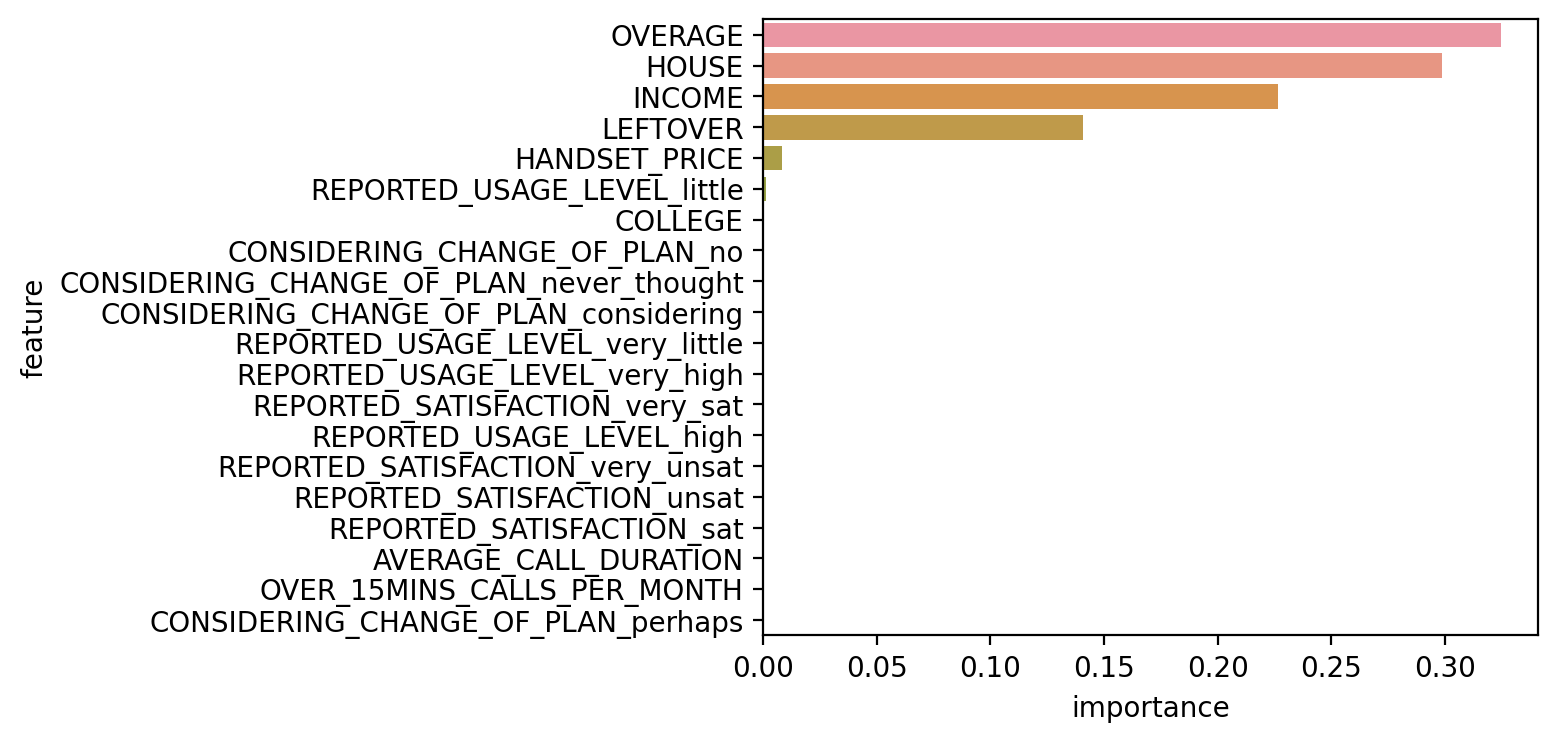

In [16]:
# 변수 데이터
perf_dic = {'feature': list(x), 'importance': model.best_estimator_.feature_importances_}
df = pd.DataFrame(perf_dic)
df.sort_values(by='importance', ascending=False, inplace=True)

# 시각화
plt.figure(figsize=(5, 4))
sns.barplot(x=df['importance'], y=df['feature'])
plt.show()

In [15]:
# 성능 평가
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(x_test)
print('confusion_matrix:\n', confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

confusion_matrix:
 [[1930 1135]
 [ 645 2290]]
              precision    recall  f1-score   support

           0       0.75      0.63      0.68      3065
           1       0.67      0.78      0.72      2935

    accuracy                           0.70      6000
   macro avg       0.71      0.70      0.70      6000
weighted avg       0.71      0.70      0.70      6000

